# dependencies

In [1]:
!pip install folium

# import

In [94]:
import pandas as pd 
import numpy as np 

import folium

In [95]:
import seaborn as sns

In [96]:
crash = pd.read_csv('crash.csv')

In [97]:
# 'Troop','County','Incident#','Unnamed: 0','Investigated By' dropped because they were not helpful
crash.drop(columns= ['Troop','County','Incident#','Unnamed: 0','Investigated By'],inplace=True)

In [98]:
crash.rename(columns={'GPS Latitude':'latitude','GPS Longitude':'longitude'},inplace = True)

In [6]:
# drop rows with index 1 and 3
# crash = crash.drop(index=[69, 144, 98, 43, 101, 116, 117, 118, 119])
crash = crash.drop(index=[119,118,43])

# folium

In [7]:
maps = folium.Map(location=[crash['latitude'].mean(), crash['longitude'].mean()], zoom_start=10)


In [8]:
for index, row in crash.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']]).add_to(maps)


In [9]:
maps.save('map.html')

# folium

In [10]:
from IPython.display import IFrame

IFrame(src='map.html', width=700, height=600)


In [11]:
from math import radians, sin, cos, sqrt, atan2

def distance(lat1, lon1, lat2, lon2):
    R = 6371  # radius of the Earth in kilometers

    # convert decimal degrees to radians
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    d = R * c

    return d

In [12]:
# center point coordinates
center_lat = 37.7749
center_lon = -122.4194

# list of other points with coordinates
points = [
    {'lat': 37.7763, 'lon': -122.4245},
    {'lat': 37.7751, 'lon': -122.4181},
    {'lat': 37.7702, 'lon': -122.4124},
    {'lat': 37.7815, 'lon': -122.4058},
]

# radius in miles
radius = 1

# check if each point is within the radius
for point in points:
    d = distance(center_lat, center_lon, point['lat'], point['lon'])
    if d <= radius:
        print(f"Point ({point['lat']}, {point['lon']}) is within {radius} miles of the center point")
    else:
        print(f"Point ({point['lat']}, {point['lon']}) is outside {radius} miles of the center point")


Point (37.7763, -122.4245) is within 1 miles of the center point
Point (37.7751, -122.4181) is within 1 miles of the center point
Point (37.7702, -122.4124) is within 1 miles of the center point
Point (37.7815, -122.4058) is outside 1 miles of the center point


# Date Time

In [99]:
def combine_date_time(df):
    # Convert 'Date' and 'Time' columns to datetime format
    df['Date'] = pd.to_datetime(df['Date'])
    df['Time'] = pd.to_datetime(df['Time'], format='%I:%M%p').dt.time
    df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

    # Combine 'Date' and 'Time' columns into new 'datetimes' column
    df['datetimes'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))

    return df


In [100]:
crash = combine_date_time(crash)

In [101]:
crash.sort_values('Time', ascending= False)

,latitude,longitude,Date,Time,Location,Hour,datetimes
33,37.131805,-93.734666,2022-11-05,23:50:00,I 44 5 MILES EAST OF MT VERNON,23,2022-11-05 23:50:00
81,37.188241,-93.760039,2023-04-10,23:50:00,MO 96 8.5 MILES NORTHEAST OF MOUNT VERNON,23,2023-04-10 23:50:00
109,37.131805,-93.734666,2022-11-05,23:50:00,I 44 5 MILES EAST OF MT VERNON,23,2022-11-05 23:50:00
79,37.139500,-93.984472,2023-04-21,23:45:00,COUNTY ROAD 1040 2 MILES NORTH OF STOTTS CITY,23,2023-04-21 23:45:00
36,37.086333,-93.851225,2022-10-10,23:07:00,I-44 1 MILE WEST OF MOUNT VERNON,23,2022-10-10 23:07:00
...,...,...,...,...,...,...,...
38,36.984322,-93.749750,2022-09-26,02:20:00,LAWRENCE 2200 1 MILE WEST OF AURORA,2,2022-09-26 02:20:00
54,37.218000,-93.785722,2022-07-30,02:00:00,LAWRENCE 2040 THREE MILES EAST OF MILLER,2,2022-07-30 02:00:00
115,37.089345,-93.810720,2022-09-16,01:40:00,I44 IN MOUNT VERNON,1,2022-09-16 01:40:00
80,36.957890,-93.996246,2023-04-19,01:25:00,LAWRENCE COUNTY ROAD 1036 .25 MILES EAST OF PI...,1,2023-04-19 01:25:00


In [16]:
crash.value_counts('Time').head(10)

Time
17:15:00    8
16:45:00    7
02:34:00    5
13:23:00    5
12:10:00    5
13:03:00    3
08:27:00    3
23:07:00    3
22:45:00    3
16:35:00    3
dtype: int64

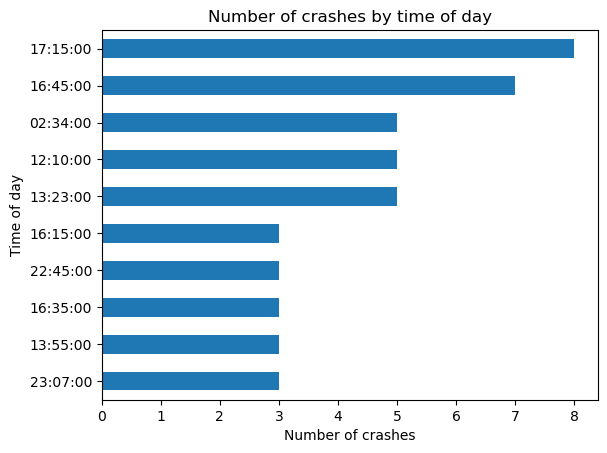

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'crash' is a DataFrame containing the 'Time' column
time_counts = crash['Time'].value_counts().head(10)

# Create horizontal bar plot of value counts
time_counts.plot(kind='barh')

# Invert y-axis to show most common value on top
plt.gca().invert_yaxis()

# Set plot title and axis labels
plt.title('Number of crashes by time of day')
plt.xlabel('Number of crashes')
plt.ylabel('Time of day')

# Display the plot
plt.show()


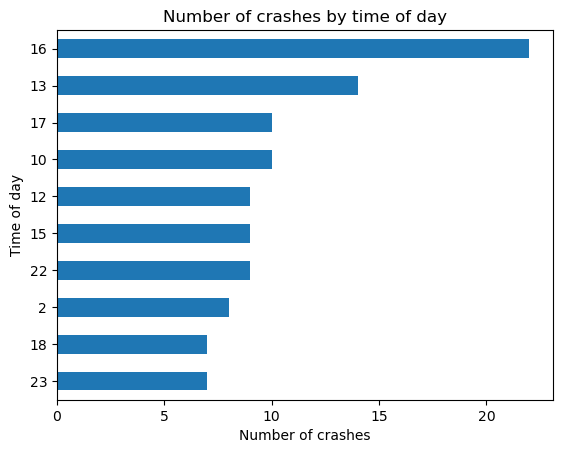

In [22]:
# Assuming 'crash' is a DataFrame containing the 'Time' column
time_counts = crash['Hour'].value_counts().head(10)

# Create horizontal bar plot of value counts
time_counts.plot(kind='barh')

# Invert y-axis to show most common value on top
plt.gca().invert_yaxis()

# Set plot title and axis labels
plt.title('Number of crashes by time of day')
plt.xlabel('Number of crashes')
plt.ylabel('Time of day')

# Display the plot
plt.show()


# tableau crash csv

In [24]:
crash.to_csv('crashTab.csv')

# injury csv

In [103]:
df = pd.read_csv('injury.csv',index_col= 0)

In [104]:
df.drop(columns= 'Name',inplace= True)

In [37]:
pd.crosstab(df['Gender'], df['Safety Device'])


Safety Device,NO,UNKNOWN,YES
Gender,,,
FEMALE,19,1,69
MALE,41,9,104


<div class="alert alert-block alert-info">
<b>Gender and Safety Devices:</b>

*Significantly more male injuries in every category here

</div>


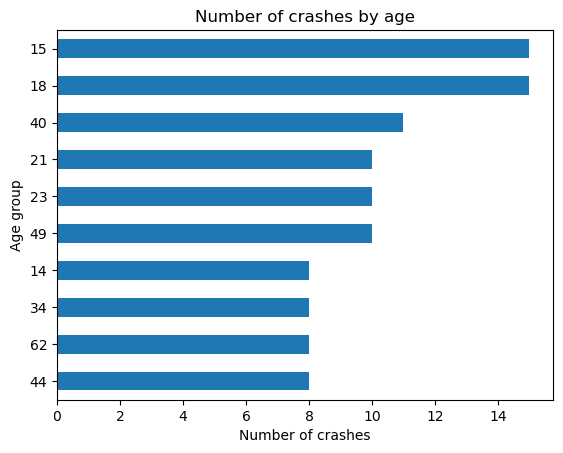

In [42]:
# Assuming 'crash' is a DataFrame containing the 'Time' column
age_counts = df['Age'].value_counts().head(10)

# Create horizontal bar plot of value counts
age_counts.plot(kind='barh')

# Invert y-axis to show most common value on top
plt.gca().invert_yaxis()

# Set plot title and axis labels
plt.title('Number of crashes by age')
plt.xlabel('Number of crashes')
plt.ylabel('Age group')

# Display the plot
plt.show()


# vehicle df

In [83]:
df = pd.read_csv('vehicle.csv',index_col= 0 )

In [84]:
df.drop(columns= ['Driver Name'],inplace= True)

In [85]:
df.head(1)

,Veh. #,Vehicle Description,Damage,Disposition,Driver Gender,Driver Age,Safety Device,Driver City/State,Driver Insurance,Vehicle Direction
0,1,2019 FREIGHTLINER CASCADIA,TOTAL,M AND M WRECKER,MALE,39,YES,"DENVER, CO",ACE AMERCIAN INSURANCE,WESTBOUND


In [86]:
'''Longitude outliers:
     GPS Latitude  GPS Longitude        Date    Time  \
69            0.0            0.0  05/23/2022  5:15PM   
144           0.0            0.0  05/23/2022  5:15PM   

                                          Location  
69   COUNTY ROAD 2185 .5 MILES EAST OF MARIONVILLE  
144  COUNTY ROAD 2185 .5 MILES EAST OF MARIONVILLE  
Latitude outliers:
     GPS Latitude  GPS Longitude        Date     Time  \
69            0.0        0.00000  05/23/2022   5:15PM   
98            0.0      -93.84275  12/28/2022  10:45PM   
144           0.0        0.00000  05/23/2022   5:15PM   

                                          Location  
69   COUNTY ROAD 2185 .5 MILES EAST OF MARIONVILLE  
98                   MO 39 2 MILES NORTH OF MILLER  
144  COUNTY ROAD 2185 .5 MILES EAST OF MARIONVILLE  '''

SyntaxError: invalid syntax (3644259944.py, line 1)

### Damage Type

<AxesSubplot:xlabel='Damage', ylabel='count'>

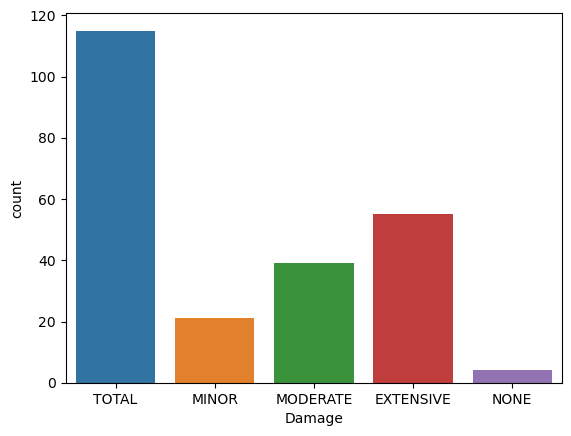

In [87]:
sns.countplot(data= df, x = "Damage" )

### Vehicle Type

In [88]:
df['Vehicle Description']

0    2019 FREIGHTLINER CASCADIA
1    2023 FREIGHTLINER CASCADIA
2            2020 SUBURU ASCENT
0    2019 FREIGHTLINER CASCADIA
1    2023 FREIGHTLINER CASCADIA
                ...            
0       2020 CHEVROLET TRAVERSE
0       2020 CHEVROLET TRAVERSE
0              2004 BUICK REGAL
0         2007 CHEVROLET PICKUP
1               2003 FORD FOCUS
Name: Vehicle Description, Length: 234, dtype: object

In [89]:
df['Year'] = df['Vehicle Description'].apply(lambda x: x.split(' ')[0])
df['Make'] = df['Vehicle Description'].apply(lambda x: x.split(' ')[1])
df['Model'] = df['Vehicle Description'].apply(lambda x: x.split(' ')[2] if len(x.split(' ')) >= 3 else '')


In [90]:
df.drop(columns= ['Disposition'],inplace= True)

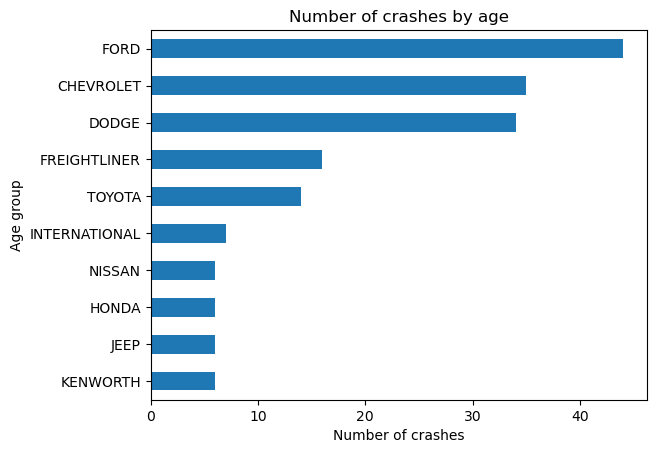

In [91]:
# Assuming 'crash' is a DataFrame containing the 'Time' column
vehdes = df['Make'].value_counts().head(10)

# Create horizontal bar plot of value counts
vehdes.plot(kind='barh')

# Invert y-axis to show most common value on top
plt.gca().invert_yaxis()

# Set plot title and axis labels
plt.title('Number of crashes by age')
plt.xlabel('Number of crashes')
plt.ylabel('Age group')

# Display the plot
plt.show()


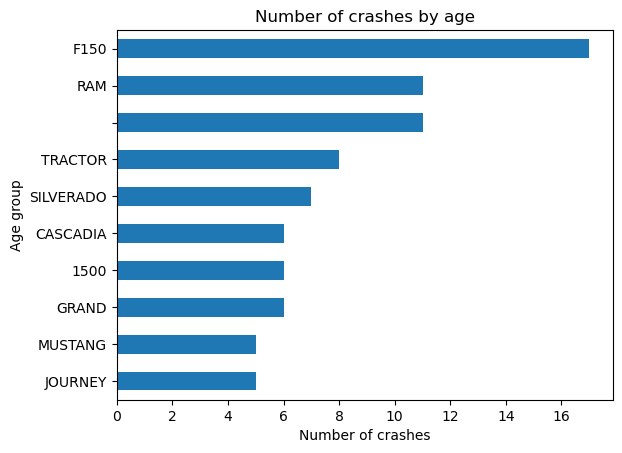

In [92]:
# Assuming 'crash' is a DataFrame containing the 'Time' column
vehdes = df['Model'].value_counts().head(10)

# Create horizontal bar plot of value counts
vehdes.plot(kind='barh')

# Invert y-axis to show most common value on top
plt.gca().invert_yaxis()

# Set plot title and axis labels
plt.title('Number of crashes by age')
plt.xlabel('Number of crashes')
plt.ylabel('Age group')

# Display the plot
plt.show()

In [93]:
df.to_csv('vehicleTab.csv')

# combining crash and injury

In [114]:
crash

,latitude,longitude,Date,Time,Location,Hour,datetimes,Fatalities
0,37.078278,-93.877861,2023-04-27,17:15:00,"I-44 WESTBOUND AT THE 42.2 MM, 3 MILES WEST OF...",17,2023-04-27 17:15:00,True
1,37.078278,-93.877861,2023-04-27,17:15:00,"I-44 WESTBOUND AT THE 42.2 MM, 3 MILES WEST OF...",17,2023-04-27 17:15:00,True
2,37.086639,-93.847805,2023-04-26,16:45:00,HWY H 1/2 MILE SOUTH OF MOUNT VERNON,16,2023-04-26 16:45:00,True
3,37.023417,-93.969500,2023-04-22,02:50:00,COUNTY ROAD 1050 THREE MILES NORTH OF PIERCE CITY,2,2023-04-22 02:50:00,True
4,36.942694,-93.927277,2023-04-19,14:40:00,"MO37 ONE MILE NORTH OF PIERCE CITY, MO",14,2023-04-19 14:40:00,True
...,...,...,...,...,...,...,...,...
147,37.074917,-93.965138,2022-05-19,08:27:00,I44 7 MILES WEST OF MOUNT VERNON,8,2022-05-19 08:27:00,True
148,37.075611,-93.975027,2022-05-17,02:34:00,"EASTBOUND I44, 1 MILE WEST OF STOTTS CITY",2,2022-05-17 02:34:00,True
149,37.075611,-93.975027,2022-05-17,02:34:00,"EASTBOUND I44, 1 MILE WEST OF STOTTS CITY",2,2022-05-17 02:34:00,True
150,37.024778,-93.641502,2022-05-11,01:02:00,LAWRENCE 2170 1 MILE NORTH OF MARIONVILLE,1,2022-05-11 01:02:00,True


In [112]:
df.head(1)

,Veh. #,Gender,Age,Injury Type,Safety Device,City/State,Involvement,Disposition
0,2,MALE,49,MODERATE,YES,"BROKEN ARROW, OK",DRIVER,"MERCY HOSPITAL, JOPLIN, MO"


In [113]:
crash['Fatalities'] = (df.loc[df['Involvement'] == 'DRIVER', 'Injury Type'] == 'FATAL').any()

In [115]:
crash.to_csv('crashTab.csv')

,latitude,longitude,Date,Time,Location,Hour,datetimes,Fatalities
0,37.078278,-93.877861,2023-04-27,17:15:00,"I-44 WESTBOUND AT THE 42.2 MM, 3 MILES WEST OF...",17,2023-04-27 17:15:00,True
1,37.078278,-93.877861,2023-04-27,17:15:00,"I-44 WESTBOUND AT THE 42.2 MM, 3 MILES WEST OF...",17,2023-04-27 17:15:00,True
2,37.086639,-93.847805,2023-04-26,16:45:00,HWY H 1/2 MILE SOUTH OF MOUNT VERNON,16,2023-04-26 16:45:00,True
3,37.023417,-93.969500,2023-04-22,02:50:00,COUNTY ROAD 1050 THREE MILES NORTH OF PIERCE CITY,2,2023-04-22 02:50:00,True
4,36.942694,-93.927277,2023-04-19,14:40:00,"MO37 ONE MILE NORTH OF PIERCE CITY, MO",14,2023-04-19 14:40:00,True
...,...,...,...,...,...,...,...,...
147,37.074917,-93.965138,2022-05-19,08:27:00,I44 7 MILES WEST OF MOUNT VERNON,8,2022-05-19 08:27:00,True
148,37.075611,-93.975027,2022-05-17,02:34:00,"EASTBOUND I44, 1 MILE WEST OF STOTTS CITY",2,2022-05-17 02:34:00,True
149,37.075611,-93.975027,2022-05-17,02:34:00,"EASTBOUND I44, 1 MILE WEST OF STOTTS CITY",2,2022-05-17 02:34:00,True
150,37.024778,-93.641502,2022-05-11,01:02:00,LAWRENCE 2170 1 MILE NORTH OF MARIONVILLE,1,2022-05-11 01:02:00,True
